In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from collections import Counter
from scipy import stats
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('hack_three_units_data.csv')

In [3]:
df.describe()

,Hybrid System Regenerative Braking Disable Request (bit),Anti-Lock Braking (ABS) Active (bit),Actual Retarder - Percent Torque (%),Drivers Demand Retarder - Percent Torque (%),Actual Maximum Available Retarder - Percent Torque (%),Engine Percent Load At Current Speed (%),Instantaneous Estimated Brake Power (kW),Actual Engine - Percent Torque (%),Engine Speed (rpm),Engine Demand Percent Torque (%),...,Wheel-Based Vehicle Speed (kph),Engine Moment of Inertia (kgm),Engine Reference Torque (Nm),Engine Default Torque Limit (Nm),Engine Coolant Temperature (C),Engine Fuel 1 Temperature 1 (C),Engine Oil Temperature 1 (C),Engine Intake Manifold 1 Temperature (C),Engine Exhaust Temperature (C),FixType
count,0.0,4187.000000,4187.000000,4187.000000,4187.0,4187.000000,4187.0,4187.000000,4187.000000,4187.000000,...,4187.000000,4187.000000,4187.000000,4187.0,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000
mean,NaN,1.220205,95.693814,95.722474,130.0,23.904944,32767.5,21.150705,1005.352878,21.520898,...,170.174929,259.330757,11036.731311,65535.0,97.696203,38.933604,105.454024,151.159303,1122.657573,0.999522
std,NaN,1.473850,57.343583,57.287987,0.0,23.579734,0.0,23.416419,444.134654,23.458571,...,113.271136,22.669932,784.117461,0.0,4.713218,6.617773,26.610810,73.550449,756.516705,0.021853
min,NaN,0.000000,-39.000000,0.000000,130.0,0.000000,32767.5,0.000000,0.000000,0.000000,...,0.000000,1.040000,2300.000000,65535.0,88.000000,10.000000,87.000000,50.000000,167.690000,0.000000
25%,NaN,0.000000,0.000000,0.000000,130.0,9.000000,32767.5,6.000000,600.100000,6.000000,...,27.062500,261.320000,11104.000000,65535.0,94.000000,35.000000,100.000000,69.000000,258.500000,1.000000
50%,NaN,0.000000,130.000000,130.000000,130.0,11.000000,32767.5,7.000000,775.900000,8.000000,...,255.996000,261.320000,11104.000000,65535.0,98.000000,39.000000,109.000000,215.000000,1774.970000,1.000000
75%,NaN,3.000000,130.000000,130.000000,130.0,38.000000,32767.5,36.000000,1442.500000,36.000000,...,255.996000,261.320000,11104.000000,65535.0,101.000000,43.000000,110.000000,215.000000,1774.970000,1.000000
max,NaN,3.000000,130.000000,130.000000,130.0,100.000000,32767.5,99.000000,1832.500000,99.000000,...,255.996000,261.320000,13696.000000,65535.0,108.000000,215.000000,1775.000000,215.000000,1774.970000,1.000000


In [4]:
# df['Engine Turbocharger 1 Speed (rpm)'].mean()
# df['Engine Trip Fuel (l)'].mean()
# df['Engine Moment of Inertia (kgm)'].mean()
# df['Engine Reference Torque (Nm)'].mean()
# df['Engine Default Torque Limit (Nm)'].mean()
# df['Engine Coolant Temperature (C)'].mean()
# df['Engine Fuel 1 Temperature 1 (C)'].mean()
# df['Engine Oil Temperature 1 (C)'].mean()
# df['Engine Intake Manifold 1 Temperature (C)'].mean()
# df['Engine Exhaust Temperature (C)'].mean()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Hybrid System Regenerative Braking Disable Request (bit)  0 non-null      float64
 1   Anti-Lock Braking (ABS) Active (bit)                      4187 non-null   int64  
 2   Actual Retarder - Percent Torque (%)                      4187 non-null   int64  
 3   Drivers Demand Retarder - Percent Torque (%)              4187 non-null   int64  
 4   Actual Maximum Available Retarder - Percent Torque (%)    4187 non-null   int64  
 5   Engine Percent Load At Current Speed (%)                  4187 non-null   int64  
 6   Instantaneous Estimated Brake Power (kW)                  4187 non-null   float64
 7   Actual Engine - Percent Torque (%)                        4187 non-null   int64  
 8   Engine Speed (rpm)

In [6]:
df.isnull().sum()

Hybrid System Regenerative Braking Disable Request (bit)    4187
Anti-Lock Braking (ABS) Active (bit)                           0
Actual Retarder - Percent Torque (%)                           0
Drivers Demand Retarder - Percent Torque (%)                   0
Actual Maximum Available Retarder - Percent Torque (%)         0
Engine Percent Load At Current Speed (%)                       0
Instantaneous Estimated Brake Power (kW)                       0
Actual Engine - Percent Torque (%)                             0
Engine Speed (rpm)                                             0
Engine Demand Percent Torque (%)                               0
Driver's Demand Engine - Percent Torque (%)                    0
Engine's Desired Operating Speed (rpm)                         0
Engine Turbocharger 1 Speed (rpm)                              0
Engine Trip Fuel (l)                                           0
Wheel-Based Vehicle Speed (kph)                                0
Engine Moment of Inertia 

<Axes: >

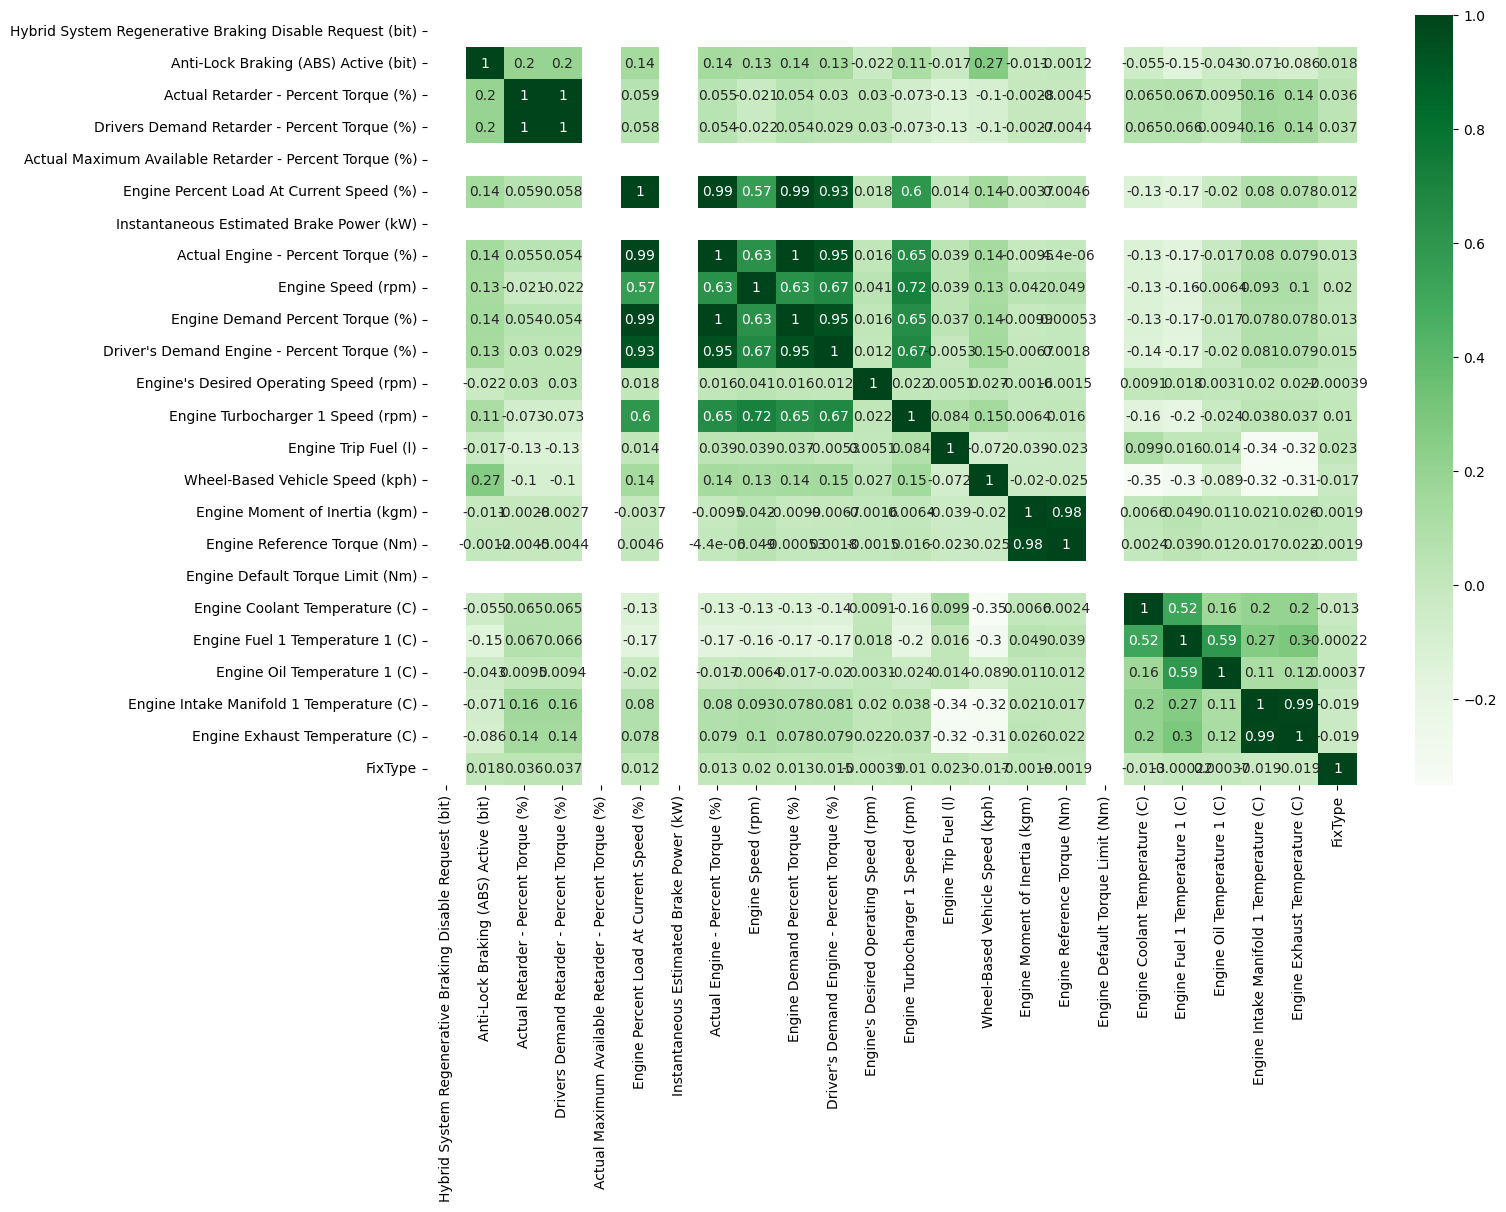

In [7]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="Greens",annot=True)

In [8]:
df.skew()

Hybrid System Regenerative Braking Disable Request (bit)          NaN
Anti-Lock Braking (ABS) Active (bit)                         0.379860
Actual Retarder - Percent Torque (%)                        -1.074138
Drivers Demand Retarder - Percent Torque (%)                -1.073075
Actual Maximum Available Retarder - Percent Torque (%)       0.000000
Engine Percent Load At Current Speed (%)                     1.350215
Instantaneous Estimated Brake Power (kW)                     0.000000
Actual Engine - Percent Torque (%)                           1.365840
Engine Speed (rpm)                                           0.233976
Engine Demand Percent Torque (%)                             1.357755
Driver's Demand Engine - Percent Torque (%)                  1.365777
Engine's Desired Operating Speed (rpm)                     -62.105543
Engine Turbocharger 1 Speed (rpm)                            1.866571
Engine Trip Fuel (l)                                        -0.665878
Wheel-Based Vehicle 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Hybrid System Regenerative Braking Disable Request (bit)  0 non-null      float64
 1   Anti-Lock Braking (ABS) Active (bit)                      4187 non-null   int64  
 2   Actual Retarder - Percent Torque (%)                      4187 non-null   int64  
 3   Drivers Demand Retarder - Percent Torque (%)              4187 non-null   int64  
 4   Actual Maximum Available Retarder - Percent Torque (%)    4187 non-null   int64  
 5   Engine Percent Load At Current Speed (%)                  4187 non-null   int64  
 6   Instantaneous Estimated Brake Power (kW)                  4187 non-null   float64
 7   Actual Engine - Percent Torque (%)                        4187 non-null   int64  
 8   Engine Speed (rpm)

In [10]:
list(enumerate(df.columns))

[(0, 'Hybrid System Regenerative Braking Disable Request (bit)'),
 (1, 'Anti-Lock Braking (ABS) Active (bit)'),
 (2, 'Actual Retarder - Percent Torque (%)'),
 (3, 'Drivers Demand Retarder - Percent Torque (%)'),
 (4, 'Actual Maximum Available Retarder - Percent Torque (%)'),
 (5, 'Engine Percent Load At Current Speed (%)'),
 (6, 'Instantaneous Estimated Brake Power (kW)'),
 (7, 'Actual Engine - Percent Torque (%)'),
 (8, 'Engine Speed (rpm)'),
 (9, 'Engine Demand Percent Torque (%)'),
 (10, "Driver's Demand Engine - Percent Torque (%)"),
 (11, "Engine's Desired Operating Speed (rpm)"),
 (12, 'Engine Turbocharger 1 Speed (rpm)'),
 (13, 'Engine Trip Fuel (l)'),
 (14, 'Wheel-Based Vehicle Speed (kph)'),
 (15, 'Engine Moment of Inertia (kgm)'),
 (16, 'Engine Reference Torque (Nm)'),
 (17, 'Engine Default Torque Limit (Nm)'),
 (18, 'Engine Coolant Temperature (C)'),
 (19, 'Engine Fuel 1 Temperature 1 (C)'),
 (20, 'Engine Oil Temperature 1 (C)'),
 (21, 'Engine Intake Manifold 1 Temperature (

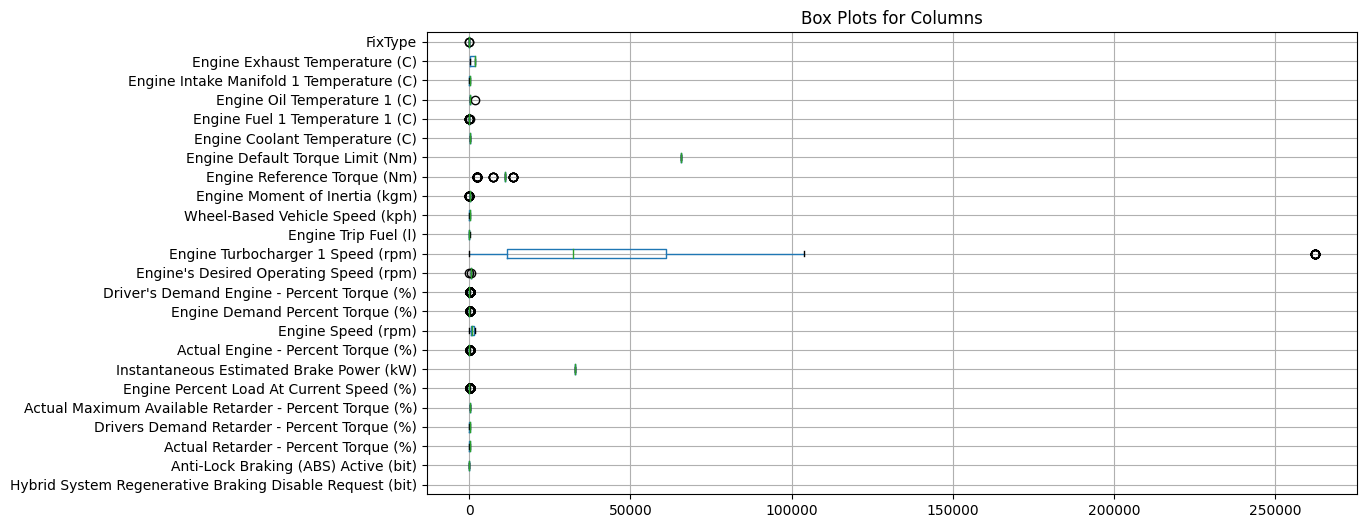

In [11]:
plt.figure(figsize=(12, 6))
df.boxplot(vert=False)
plt.title("Box Plots for Columns")
plt.show()

In [12]:
skewness_threshold = 1.0
skewness = df.apply(lambda x: x.skew())
skewed_columns = skewness[skewness > skewness_threshold]
print("Columns with skewness above the threshold:")
print(skewed_columns.index.tolist())

Columns with skewness above the threshold:
['Engine Percent Load At Current Speed (%)', 'Actual Engine - Percent Torque (%)', 'Engine Demand Percent Torque (%)', "Driver's Demand Engine - Percent Torque (%)", 'Engine Turbocharger 1 Speed (rpm)', 'Engine Fuel 1 Temperature 1 (C)', 'Engine Oil Temperature 1 (C)']


In [47]:
#full columns
#X=df[["Anti-Lock Braking (ABS) Active (bit)","Actual Retarder - Percent Torque (%)","Drivers Demand Retarder - Percent Torque (%)","Actual Maximum Available Retarder - Percent Torque (%)","Engine Percent Load At Current Speed (%)","Instantaneous Estimated Brake Power (kW)","Actual Engine - Percent Torque (%)","Engine Speed (rpm)","Engine Demand Percent Torque (%)","Driver's Demand Engine - Percent Torque (%)","Engine's Desired Operating Speed (rpm)","Engine Turbocharger 1 Speed (rpm)","Engine Trip Fuel (l)","Wheel-Based Vehicle Speed (kph)","Engine Moment of Inertia (kgm)","Engine Reference Torque (Nm)","Engine Default Torque Limit (Nm)","Engine Coolant Temperature (C)","Engine Fuel 1 Temperature 1 (C)","Engine Oil Temperature 1 (C)","Engine Intake Manifold 1 Temperature (C)","Engine Exhaust Temperature (C)"]]
#y=df['FixType']

In [13]:
#after skew
X=df[[
"Anti-Lock Braking (ABS) Active (bit)",
"Actual Retarder - Percent Torque (%)",
"Drivers Demand Retarder - Percent Torque (%)",
"Actual Maximum Available Retarder - Percent Torque (%)",
"Instantaneous Estimated Brake Power (kW)",
"Engine Speed (rpm)",
"Engine's Desired Operating Speed (rpm)",
"Engine Trip Fuel (l)",
"Wheel-Based Vehicle Speed (kph)",
"Engine Moment of Inertia (kgm)",
"Engine Reference Torque (Nm)",
"Engine Default Torque Limit (Nm)",
"Engine Coolant Temperature (C)",
"Engine Intake Manifold 1 Temperature (C)",
"Engine Exhaust Temperature (C)"]]
y=df['FixType']

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                              Feature    Importance
12                     Engine Coolant Temperature (C)  3.740119e-01
7                                Engine Trip Fuel (l)  2.152721e-01
5                                  Engine Speed (rpm)  1.198478e-01
8                     Wheel-Based Vehicle Speed (kph)  9.011465e-02
2        Drivers Demand Retarder - Percent Torque (%)  5.972029e-02
1                Actual Retarder - Percent Torque (%)  5.487846e-02
13           Engine Intake Manifold 1 Temperature (C)  3.114145e-02
14                     Engine Exhaust Temperature (C)  3.054002e-02
0                Anti-Lock Braking (ABS) Active (bit)  2.124484e-02
9                      Engine Moment of Inertia (kgm)  2.450665e-03
10                       Engine Reference Torque (Nm)  7.775885e-04
6              Engine's Desired Operating Speed (rpm)  2.531318e-07
3   Actual Maximum Available Retarder - Percent To...  0.000000e+00
4            Instantaneous Estimated Brake Power

In [30]:
#X=df[["Anti-Lock Braking (ABS) Active (bit)","Actual Retarder - Percent Torque (%)","Drivers Demand Retarder - Percent Torque (%)","Engine Percent Load At Current Speed (%)","Actual Engine - Percent Torque (%)","Engine Speed (rpm)","Engine Demand Percent Torque (%)","Driver's Demand Engine - Percent Torque (%)","Engine Turbocharger 1 Speed (rpm)",'Engine Trip Fuel (l)','Wheel-Based Vehicle Speed (kph)',"Engine Coolant Temperature (C)","Engine Fuel 1 Temperature 1 (C)","Engine Oil Temperature 1 (C)","Engine Intake Manifold 1 Temperature (C)","Engine Exhaust Temperature (C)"]]
X=df[["Engine Turbocharger 1 Speed (rpm)","Engine Oil Temperature 1 (C)","Engine Fuel 1 Temperature 1 (C)","Engine Coolant Temperature (C)","Engine Trip Fuel (l)","Engine Speed (rpm)","Drivers Demand Retarder - Percent Torque (%)","Engine Percent Load At Current Speed (%)","Actual Retarder - Percent Torque (%)","Driver's Demand Engine - Percent Torque (%)","Actual Engine - Percent Torque (%)","Wheel-Based Vehicle Speed (kph)","Engine Demand Percent Torque (%)","Anti-Lock Braking (ABS) Active (bit)","Engine Intake Manifold 1 Temperature (C)","Engine Exhaust Temperature (C)","Engine Reference Torque (Nm)","Engine Moment of Inertia (kgm)"]]
y=df['FixType']

In [31]:
X.shape[1]

18

In [38]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=18, n_clusters_per_class=1, n_samples=X.shape[0], random_state=42)
print("Class distribution before SMOTE:", Counter(y))
target_count = Counter(y)[1]
synthetic_samples_needed = target_count - Counter(y)[0]
smote = SMOTE(sampling_strategy={0: synthetic_samples_needed}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({1: 3768, 0: 419})
Class distribution after SMOTE: Counter({1: 3768, 0: 3349})


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [43]:
X.shape

(4187, 18)

In [45]:
x_test.shape

(838, 18)

In [46]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
x_test

array([[ 4.37974631e-01,  7.60254835e-01,  1.29914558e+00, ...,
        -1.23590552e+00,  4.78269515e-01, -5.89816532e-01],
       [-5.76809014e-01,  1.12391919e+00, -2.33470918e-01, ...,
        -5.54814394e-01, -1.06384963e+00,  5.05901720e-04],
       [ 1.17727728e+00,  3.25970127e-01,  1.57903593e-01, ...,
        -5.90574184e-01,  4.89418440e-01,  9.73675603e-02],
       ...,
       [-8.06926319e-01,  1.03433395e+00, -4.65877845e-01, ...,
        -3.38213070e+00,  5.54897927e-01,  6.81968860e-01],
       [ 1.50290347e-01,  1.05942426e+00, -2.34171854e+00, ...,
        -2.16142906e+00, -1.98633955e+00,  2.95200459e-01],
       [ 1.17045553e+00,  1.43058615e+00,  3.38766191e-01, ...,
        -1.38938593e+00, -1.55599066e+00, -1.49673946e+00]])

In [48]:
y_pred = clf.predict(x_test)

In [49]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9964200477326969


In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 73   2]
 [  1 762]]


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [52]:
roc_auc

0.9860113586719091

In [53]:
conf_matrix

array([[ 73,   2],
       [  1, 762]], dtype=int64)

In [54]:
accuracy

0.9964200477326969

In [55]:
class_report = classification_report(y_test, y_pred)

In [56]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98        75\n           1       1.00      1.00      1.00       763\n\n    accuracy                           1.00       838\n   macro avg       0.99      0.99      0.99       838\nweighted avg       1.00      1.00      1.00       838\n'

In [57]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
df.shape

(4187, 24)

In [58]:
x_test.shape

(20, 5)

In [58]:
import pickle

In [59]:
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [60]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [61]:
clf2=loaded_model
clf2.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
import os
os.getcwd()

'C:\\Users\\z032989\\AIA\\GET_Hack'